In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import seaborn as sns
import pandas as pd
import numpy as np
### Load the Data set
df = pd.read_csv("diabetes.csv")
df.size

6912

In [2]:
### Data cleaning
# Drop zeroed row in the ff features
df = df.loc[df['BMI'] > 0]
df = df.loc[df['BloodPressure'] > 0]
df = df.loc[df['Glucose'] > 0]


In [3]:
df.size

6516

In [4]:
from sklearn.model_selection import train_test_split
### Split the data set
X = df[['Glucose', 'BMI', 'Insulin', 'Age']]
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
### Train the model
clf = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=4, min_samples_split=2, min_samples_leaf=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [6]:
### Qualitative Evaluation
test_set_y_preds = clf.predict(X_test)
print("Model performance on test set: ")
print("Accuracy %.4f" % accuracy_score(y_test, test_set_y_preds))
print("Precision %.4f" % precision_score(y_test, test_set_y_preds))
print("Recall %.4f" % recall_score(y_test, test_set_y_preds))
print("F1 %.4f" % f1_score(y_test, test_set_y_preds))

print("\nModel performance on training set: ")
training_set_y_preds = clf.predict(X_train)
print("Accuracy %.4f" % accuracy_score(y_train, training_set_y_preds))
print("Precision %.4f" % precision_score(y_train, training_set_y_preds))
print("Recall %.4f" % recall_score(y_train, training_set_y_preds))
print("F1 %.4f" % f1_score(y_train, training_set_y_preds))


Model performance on test set: 
Accuracy 0.8138
Precision 0.7353
Recall 0.5814
F1 0.6494

Model performance on training set: 
Accuracy 0.7927
Precision 0.8028
Recall 0.5534
F1 0.6552


                0
Glucose  0.504119
BMI      0.359950
Age      0.135932
Insulin  0.000000


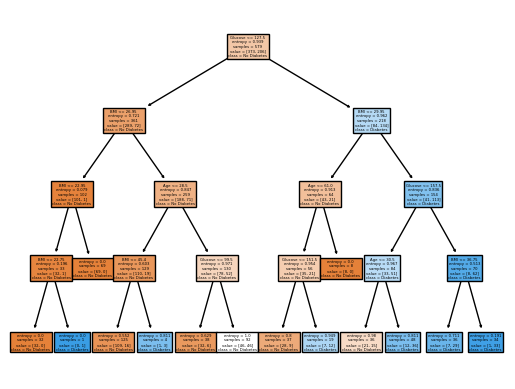

In [7]:
### Display the current tree
plot_tree(clf, feature_names = list(X.columns), class_names = ['No Diabetes', 'Diabetes'],filled = True)

### Which features are actually being used?
featureNames = X.columns
featureImportance = pd.DataFrame(clf.feature_importances_, index = featureNames).sort_values(0, ascending=False)
print(featureImportance)